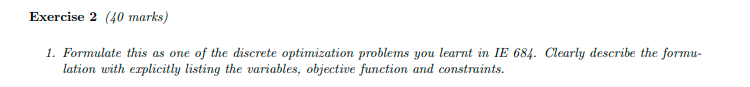

Let $x_i $ denotes the number of boxes of type $i $ produced. This can be an non negative integer.$x_i \in \mathbf N \cup \{0\}$

Let $y_i $ is a binary variable indicating whether any boxes of type $i$ are produced. $y_i = 1 $ if $x_i > 0 $, and $y_i = 0 $ otherwise.

This constraint can be using big M method.

$$x_i \leq M \cdot y_i \quad $$
$$\text{for } i = 1, 2, \ldots, 6 $$

Where $M$ is very large number.

Let $v_i$ be volume of box type $i$.Then the objective function will be-

$$ min\quad \sum_{i=1}^{6} \left(1500 \cdot y_i + 100 \cdot v_i \cdot x_i \right)$$

The constraint including the bigM method:

i). The demand should be met.
$$ x_i \geq d_i \quad $$
$$\text{for } i = 1, 2, \ldots, 6 $$
where $d_i$ is demand for box of type $i$

ii). $$x_i \leq M \cdot y_i \quad $$
$$\text{for } i = 1, 2, \ldots, 6 $$

In [12]:
!pip install pulp

In [15]:
import pulp

def solve_with_solver():
    demands = [300, 450, 80, 500, 150, 800]
    volumes = [0.15, 0.25, 0.35, 0.5, 0.6, 0.75]
    prices = [300, 300, 350, 500, 600, 800]

    # Create a LP Minimization problem
    prob = pulp.LpProblem("Minimize_Cost", pulp.LpMinimize)

    # Define decision variables
    x = [pulp.LpVariable(f"x{i}", lowBound=0, cat='Integer') for i in range(1, 7)]

    # Objective Function
    prob += pulp.lpSum([(150 + 100 * volumes[i-1]) * x[i-1] for i in range(1, 7)])

    # Constraints
    for i in range(6):
        prob += x[i] >= demands[i]

    # Solve the problem
    prob.solve()

    # Output results
    optimal_cost = pulp.value(prob.objective)
    optimal_boxes = [pulp.value(var) for var in x]

    return optimal_cost, optimal_boxes

optimal_cost, optimal_boxes = solve_with_solver()
print("Optimal Cost:", optimal_cost)
print("Optimal Number of Boxes:", optimal_boxes)



Optimal Cost: 454550.0
Optimal Number of Boxes: [300.0, 450.0, 80.0, 500.0, 150.0, 800.0]


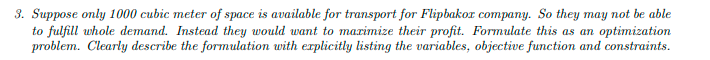

Let $x_i $ denotes the number of boxes of type $i $ produced. This can be an Non Negative integer. $x_i \in \mathbf{N} \cup \{0\}$

Let $y_i $ is a binary variable indicating whether any boxes of type $i$ are produced. $y_i = 1 $ if $x_i > 0 $, and $y_i = 0 $ otherwise.

Let $p_i$ be the price of the product $x_i$.

This constraint can be enforced using big M method. Meaning,

$$x_i \leq M \cdot y_i \quad \text{for } i = 1, 2, \ldots, 6 $$

Where $M$ is sufficiently large.

Let $v_i$ be volume of box type $i$. Then the objective function, will become to maximize profit which is Price - Cost of Making:

$$ maximize \quad \sum_{i=1}^{6} \left(p_i \cdot x_i - (1500 \cdot y_i + 100 \cdot v_i \cdot x_i \right))$$

$$ maximize \quad \sum_{i=1}^{6} (p_i -100 \cdot  v_i) \cdot x_i - (1500 \cdot y_i )$$

The constraint including the bigM method:

1. The max volume will be 1000.

$$\sum_{j=1}^{6}x_j \cdot v_j \leq 1000 \quad $$


2. $$x_i \leq M \cdot y_i \quad \text{for } i = 1, 2, \ldots, 6 $$

In [4]:
!pip install -q pyomo
!apt-get install -y -qq glpk-utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.9 MB/s eta 0:00:00
Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 121753 files and directories currently installed.)
Preparing to unpack .../libsuitesparseconfig5_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../libamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../libcolamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../libglpk40_5.0-1_amd64.deb ...
Unpacking libglpk40:amd64 (5.0-1) ...
Selecting previously unselected pac

In [5]:
from pyomo.environ import *

In [9]:
dem = [300, 450, 80, 500, 150, 800]
vol = [0.15, 0.25, 0.35, 0.5, 0.6, 0.75]
price = [300, 300, 350, 500, 600, 800]
M = 100000000

In [10]:
model = ConcreteModel()
model.x = Var(range(6), domain = NonNegativeIntegers)
model.y = Var(range(6), domain = Binary)
model.obj = Objective(expr = sum(( (price[i] - 100*vol[i])*model.x[i] - 1500*model.y[i] )for i in range(6)), sense = maximize)

model.constraints = ConstraintList()
model.constraints.add(expr = sum(model.x[i]*vol[i] for i in range(6)) <= 1000)
for i in range(6):
  model.constraints.add(expr = model.x[i] <= M*model.y[i])

result = SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model)
model.pprint()

2 Var Declarations
    x : Size=6, Index={0, 1, 2, 3, 4, 5}
        Key : Lower : Value  : Upper : Fixed : Stale : Domain
          0 :     0 : 6666.0 :  None : False : False : NonNegativeIntegers
          1 :     0 :    0.0 :  None : False : False : NonNegativeIntegers
          2 :     0 :    0.0 :  None : False : False : NonNegativeIntegers
          3 :     0 :    0.0 :  None : False : False : NonNegativeIntegers
          4 :     0 :    0.0 :  None : False : False : NonNegativeIntegers
          5 :     0 :    0.0 :  None : False : False : NonNegativeIntegers
    y : Size=6, Index={0, 1, 2, 3, 4, 5}
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :     0 :   1.0 :     1 : False : False : Binary
          1 :     0 :   0.0 :     1 : False : False : Binary
          2 :     0 :   0.0 :     1 : False : False : Binary
          3 :     0 :   0.0 :     1 : False : False : Binary
          4 :     0 :   0.0 :     1 : False : False : Binary
          5 :     0 :

In [18]:
# display solution
print('Objective Value: ',model.obj())
print("|||||||||||||")
print('Decision Variables')
for i in range(6):
  print(f'y{i} = { model.y[i]()}')
for i in range(6):
  print(f'x{i} = { model.x[i]()}')


print('Constraints')
print("|||||||||||||")
for i in range(7):
  print(f'Constraint{i+1}  =  {model.constraints[i+1]()}')

Objective Value:  1898310.0
|||||||||||||
Decision Variables
y0 = 1.0
y1 = 0.0
y2 = 0.0
y3 = 0.0
y4 = 0.0
y5 = 0.0
x0 = 6666.0
x1 = 0.0
x2 = 0.0
x3 = 0.0
x4 = 0.0
x5 = 0.0
Constraints
|||||||||||||
Constraint1  =  999.9
Constraint2  =  -99993334.0
Constraint3  =  0.0
Constraint4  =  0.0
Constraint5  =  0.0
Constraint6  =  0.0
Constraint7  =  0.0
